# Experiment - 10 (Gridsearch CV and Logistic Regression implementation on Mushrooms dataset)

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Importing Dataset

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X = pd.get_dummies(df.drop("class", axis=1))
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
y = df["class"]
y[y == "e"] = 0
y[y == "p"] = 1
y = y.astype("int")
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

Splitting Test Train Data

In [5]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, shuffle=True)

Train X data

In [6]:
trainX.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
339,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
6255,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
7950,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
5948,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
7115,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


Train Y Data

In [7]:
trainY.head()

339     0
6255    1
7950    1
5948    0
7115    1
Name: class, dtype: int32

Fitting Logistic Regression model on the test train split

In [8]:
model = LogisticRegression()

In [9]:
weights = np.linspace(0.0, 0.99, 500)
param_grid = {
    "C": [0.1, 0.5, 1, 10, 15, 20],
    "penalty": ["l1", "l2"],
    "class_weight": [{0: x, 1: 1.0 - x} for x in weights],
}
param_grid = {"C": [0.1, 0.5, 1, 10, 15, 20]}

using StratifiesKfold

In [10]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Applying GridsearchCV

In [11]:
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="f1",
    cv=folds,
    return_train_score=True,
)
grid_result = grid.fit(trainX, trainY)

Printing best Hyperparameters(C) And F1 Score

In [12]:
print("Best hyperparameters: ", grid_result.best_params_)
print("Best F1 score: ", grid_result.best_score_)

Best hyperparameters:  {'C': 10}
Best F1 score:  1.0


Plotting C vs Mean test score graph

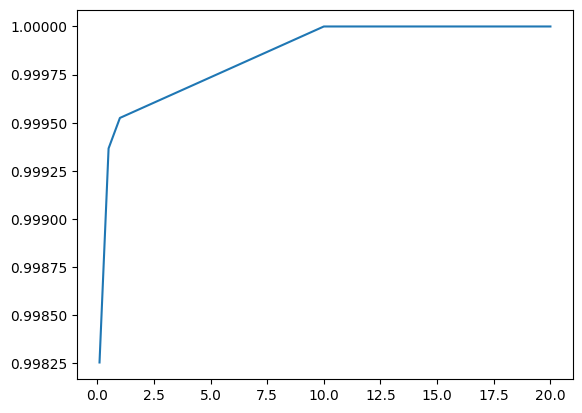

In [13]:
plt.plot(param_grid["C"], grid_result.cv_results_["mean_test_score"])

Applying KNN Classifier on the same


In [14]:

features = X.columns.tolist()

feature_acc = []
for feature in features:
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(trainX[[feature]], trainY)
    acc = accuracy_score(testY, knn.predict(testX[[feature]]))
    feature_acc.append(acc)

feature_rank = np.argsort(feature_acc)[::-1]

for i, feature in enumerate(np.array(features)[feature_rank]):
    print(f'{i+1}. {feature}: {feature_acc[feature_rank[i]]:.3f}')

1. odor_n: 0.886
2. stalk-surface-above-ring_k: 0.775
3. stalk-surface-below-ring_k: 0.769
4. gill-size_n: 0.766
5. gill-size_b: 0.766
6. ring-type_p: 0.764
7. gill-color_b: 0.747
8. stalk-surface-above-ring_s: 0.735
9. bruises_f: 0.730
10. bruises_t: 0.730
11. population_v: 0.716
12. stalk-surface-below-ring_s: 0.716
13. spore-print-color_w: 0.677
14. spore-print-color_k: 0.657
15. stalk-root_?: 0.656
16. spore-print-color_n: 0.647
17. ring-type_e: 0.623
18. odor_y: 0.611
19. gill-spacing_c: 0.610
20. gill-spacing_w: 0.610
21. stalk-color-below-ring_w: 0.604
22. odor_s: 0.602
23. habitat_l: 0.578
24. cap-shape_k: 0.576
25. cap-color_e: 0.569
26. gill-color_n: 0.562
27. cap-surface_f: 0.561
28. gill-color_w: 0.558
29. habitat_g: 0.557
30. stalk-root_e: 0.545
31. stalk-color-below-ring_p: 0.536
32. cap-shape_x: 0.536
33. cap-surface_y: 0.536
34. veil-color_w: 0.536
35. cap-surface_s: 0.536
36. stalk-color-below-ring_g: 0.534
37. population_s: 0.533
38. stalk-color-above-ring_g: 0.530
39